In [16]:
import numpy as np
import pandas as pd
import sys
import statsmodels.formula.api as sm

In [22]:
df = pd.read_csv("year_prediction.csv")
df.describe()

,label,TimbreAvg1,TimbreAvg2,TimbreAvg3,TimbreAvg4,TimbreAvg5,TimbreAvg6,TimbreAvg7,TimbreAvg8,TimbreAvg9,...,TimbreCovariance69,TimbreCovariance70,TimbreCovariance71,TimbreCovariance72,TimbreCovariance73,TimbreCovariance74,TimbreCovariance75,TimbreCovariance76,TimbreCovariance77,TimbreCovariance78
count,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,...,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000
mean,1998.397082,43.387126,1.289554,8.658347,1.164124,-6.553601,-9.521975,-2.391089,-1.793236,3.727876,...,15.755406,-73.461500,41.542422,37.934119,0.315751,17.669213,-26.315336,4.458641,20.035136,1.329105
std,10.931046,6.067558,51.580351,35.268585,16.322790,22.860785,12.857751,14.571873,7.963827,10.582861,...,32.099635,175.618889,122.228799,95.050631,16.161764,114.427905,173.977336,13.346557,185.558247,22.088576
min,1922.000000,1.749000,-337.092500,-301.005060,-154.183580,-181.953370,-81.794290,-188.214000,-72.503850,-126.479040,...,-437.722030,-4402.376440,-1810.689190,-3098.350310,-341.789120,-3168.924570,-4319.992320,-236.039260,-7458.378150,-381.424430
25%,1994.000000,39.954690,-26.059520,-11.462710,-8.487500,-20.666450,-18.440990,-10.780600,-6.468420,-2.293660,...,-1.812650,-139.555160,-20.986900,-4.669540,-6.781590,-31.580610,-101.530300,-2.566090,-59.509270,-8.820210
50%,2002.000000,44.258500,8.417850,10.476320,-0.652840,-6.007770,-11.188390,-2.046670,-1.736450,3.822310,...,9.171850,-53.090060,28.791060,33.623630,0.820840,15.598470,-21.204120,3.117640,7.759730,0.053050
75%,2006.000000,47.833890,36.124010,29.764820,8.787540,7.741870,-2.388960,6.508580,2.913450,9.961820,...,26.274480,13.478730,89.661770,77.785800,8.470990,67.794960,52.389330,9.967740,86.351610,9.679520
max,2011.000000,61.970140,384.065730,322.851430,335.771820,262.068870,166.236890,172.402680,126.741270,146.297950,...,840.973380,4469.454870,3210.701700,1734.079690,260.544900,3662.065650,2833.608950,463.419500,7393.398440,677.899630


In [23]:
df_copy = df
df
# df.iloc[:, 0].value_counts()

,label,TimbreAvg1,TimbreAvg2,TimbreAvg3,TimbreAvg4,TimbreAvg5,TimbreAvg6,TimbreAvg7,TimbreAvg8,TimbreAvg9,...,TimbreCovariance69,TimbreCovariance70,TimbreCovariance71,TimbreCovariance72,TimbreCovariance73,TimbreCovariance74,TimbreCovariance75,TimbreCovariance76,TimbreCovariance77,TimbreCovariance78
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
5,2001,50.54767,0.31568,92.35066,22.38696,-25.51870,-19.04928,20.67345,-5.19943,3.63566,...,6.59753,-50.69577,26.02574,18.94430,-0.33730,6.09352,35.18381,5.00283,-11.02257,0.02263
6,2001,50.57546,33.17843,50.53517,11.55217,-27.24764,-8.78206,-12.04282,-9.53930,28.61811,...,11.63681,25.44182,134.62382,21.51982,8.17570,35.46251,11.57736,4.50056,-4.62739,1.40192
7,2001,48.26892,8.97526,75.23158,24.04945,-16.02105,-14.09491,8.11871,-1.87566,7.46701,...,18.03989,-58.46192,-65.56438,46.99856,-4.09602,56.37650,-18.29975,-0.30633,3.98364,-3.72556
8,2001,49.75468,33.99581,56.73846,2.89581,-2.92429,-26.44413,1.71392,-0.55644,22.08594,...,18.70812,5.20391,-27.75192,17.22100,-0.85210,-15.67150,-26.36257,5.48708,-9.13495,6.08680
9,2007,45.17809,46.34234,-40.65357,-2.47909,1.21253,-0.65302,-6.95536,-12.20040,17.02512,...,-4.36742,-87.55285,-70.79677,76.57355,-7.71727,3.26926,-298.49845,11.49326,-89.21804,-15.09719


<IPython.core.display.Javascript object>


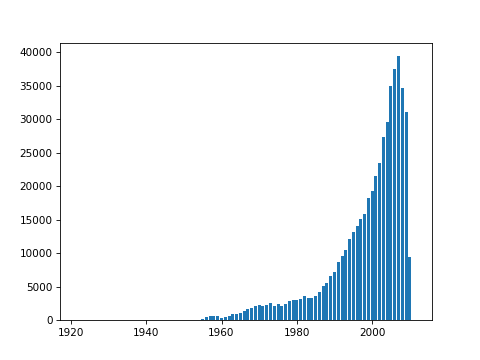

In [24]:
%matplotlib notebook

year = df.iloc[:, 0].value_counts().keys().tolist()
count = df.iloc[:, 0].value_counts().tolist()
import matplotlib.pyplot as plt

plt.bar(year, count)
plt.show()

In [25]:
y = df.iloc[:, 0].values
df = df.drop(["label"], axis=1)
df=(df-df.mean())/df.std()
x = df.values

x = np.append(arr = np.ones((515345, 1)).astype(int), values = x, axis = 1)
x

array([[ 1.        ,  1.08057377,  0.391265  , ..., -0.47059862,
        -0.25597686,  0.04229175],
       [ 1.        ,  0.8809185 ,  0.33229215, ...,  0.56874361,
         0.20693984,  1.15858551],
       [ 1.        ,  1.2476212 ,  0.59259903, ..., -0.33845667,
         0.10581876, -0.09020751],
       ..., 
       [ 1.        ,  0.28700085,  0.2203945 , ..., -0.78899385,
         0.18284315, -0.42658908],
       [ 1.        ,  0.12839009,  0.60282889, ...,  1.18860312,
        -0.02804546,  1.73935993],
       [ 1.        ,  1.39597082,  1.12110513, ..., -0.74729096,
         0.06639901,  0.49095127]])

In [27]:
x1 = [x2 for x2 in range(0,91)]

In [28]:
x_opt = x[:, x1]
regressor_ols = sm.OLS(endog = y, exog = x_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     1778.
Date:                Thu, 31 May 2018   Prob (F-statistic):               0.00
Time:                        01:29:08   Log-Likelihood:            -1.8940e+06
No. Observations:              515345   AIC:                         3.788e+06
Df Residuals:                  515254   BIC:                         3.789e+06
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1998.3971      0.013    1.5e+05      0.000    1998.371    1998.423
x1             5.3117      0.024    224.342      0.000       5.265       5.358
x2            -2.9054      0.021   -136.380      0.000      -2.947      -2.864
x3            -1.5394      0.028    -55.975      0.000      -1.593      -1.486
x4             0.0547      0.036      1.507      0.132      -0.016       0.126
x5            -0.3371      0.017    -20.426      0.000      -0.369      -0.305
x6            -2.8296      0.032    -88.852      0.000      -2.892      -2.767
x7            -0.0982      0.022     -4.401      0.000      -0.142      -0.054
x8            -0.8035      0.024    -33.969      0.000      -0.850      -0.757
x9            -0.7458      0.019    -38.952      0.000      -0.783      -0.708
x10            0.1637      0.026      6.367      0.000       0.113       0.214
x11           -0.7243      0.028    -25.421      0.000      -0.780      -0.668
x12           -0.0154      0.017     -0.888      0.375      -0.049       0.019
x13            1.0465      0.021     50.756      0.000       1.006       1.087
x14            0.6212      0.022     27.873      0.000       0.578       0.665
x15           -0.5331      0.025    -21.101      0.000      -0.583      -0.484
x16            0.6548      0.036     18.417      0.000       0.585       0.724
x17            0.2267      0.021     10.629      0.000       0.185       0.269
x18            0.8461      0.041     20.715      0.000       0.766       0.926
x19            0.6110      0.027     22.540      0.000       0.558       0.664
x20            0.6584      0.035     18.821      0.000       0.590       0.727
x21            0.1648      0.030      5.452      0.000       0.106       0.224
x22           -0.0667      0.037     -1.797      0.072      -0.139       0.006
x23            1.4096      0.041     34.302      0.000       1.329       1.490
x24            0.4316      0.025     17.206      0.000       0.382       0.481
x25           -0.4318      0.018    -24.257      0.000      -0.467      -0.397
x26            0.0509      0.017      2.937      0.003       0.017       0.085
x27            0.8660      0.026     33.043      0.000       0.815       0.917
x28            0.1156      0.017      6.786      0.000       0.082       0.149
x29            0.1427      0.019      7.401      0.000       0.105       0.181
x30           -0.0410      0.020     -2.027      0.043      -0.081      -0.001
x31           -0.1392      0.019     -7.301      0.000      -0.177      -0.102
x32           -0.1006      0.018     -5.580      0.000      -0.136      -0.065
x33           -0.4137      0.024    -17.560      0.000      -0.460      -0.368
x34            0.1323      0.019      6.949      0.000       0.095       0.170
x35            0.0786      0.022      3.571      0.000       0.035       0.122
x3

In [29]:
pvalues = np.array(regressor_ols.pvalues.astype(float))
pvalues = np.around(pvalues, decimals=2)

In [30]:
pvalues.argmax()

55

In [31]:
while (np.amax(pvalues)>0.05):
    x_opt = x[:, x1]
    regressor_ols = sm.OLS(endog = y, exog = x_opt).fit()
    regressor_ols.summary()
    pvalues = np.array(regressor_ols.pvalues.astype(float))
    pvalues = np.around(pvalues, decimals=2)
    if (np.amax(pvalues)<0.05):
        break
    ind = pvalues.argmax()
    del x1[ind]
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     2052.
Date:                Thu, 31 May 2018   Prob (F-statistic):               0.00
Time:                        01:31:52   Log-Likelihood:            -1.8941e+06
No. Observations:              515345   AIC:                         3.788e+06
Df Residuals:                  515266   BIC:                         3.789e+06
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1998.3971      0.013    1.5e+05      0.000    1998.371    1998.423
x1             5.3072      0.023    228.305      0.000       5.262       5.353
x2            -2.9070      0.020   -143.744      0.000      -2.947      -2.867
x3            -1.5005      0.020    -74.459      0.000      -1.540      -1.461
x4            -0.3359      0.016    -20.969      0.000      -0.367      -0.305
x5            -2.8294      0.027   -104.156      0.000      -2.883      -2.776
x6            -0.0922      0.018     -5.092      0.000      -0.128      -0.057
x7            -0.8003      0.022    -35.713      0.000      -0.844      -0.756
x8            -0.7509      0.018    -41.092      0.000      -0.787      -0.715
x9             0.1761      0.023      7.572      0.000       0.131       0.222
x10           -0.7273      0.020    -36.536      0.000      -0.766      -0.688
x11            1.0330      0.018     57.384      0.000       0.998       1.068
x12            0.6153      0.021     28.848      0.000       0.573       0.657
x13           -0.5271      0.025    -21.179      0.000      -0.576      -0.478
x14            0.6670      0.035     19.053      0.000       0.598       0.736
x15            0.2251      0.020     11.063      0.000       0.185       0.265
x16            0.8664      0.038     22.691      0.000       0.792       0.941
x17            0.6028      0.027     22.511      0.000       0.550       0.655
x18            0.6351      0.030     20.945      0.000       0.576       0.695
x19            0.1361      0.028      4.822      0.000       0.081       0.191
x20            1.4188      0.038     37.204      0.000       1.344       1.494
x21            0.4288      0.025     17.215      0.000       0.380       0.478
x22           -0.4252      0.017    -24.446      0.000      -0.459      -0.391
x23            0.0540      0.017      3.208      0.001       0.021       0.087
x24            0.8576      0.026     33.287      0.000       0.807       0.908
x25            0.1194      0.017      7.085      0.000       0.086       0.152
x26            0.1383      0.019      7.306      0.000       0.101       0.175
x27           -0.0445      0.020     -2.227      0.026      -0.084      -0.005
x28           -0.1372      0.019     -7.291      0.000      -0.174      -0.100
x29           -0.1093      0.018     -6.189      0.000      -0.144      -0.075
x30           -0.4066      0.023    -17.616      0.000      -0.452      -0.361
x31            0.1233      0.018      6.908      0.000       0.088       0.158
x32            0.0838      0.022      3.872      0.000       0.041       0.126
x33           -0.5766      0.021    -27.244      0.000      -0.618      -0.535
x34           -0.1130      0.018     -6.331      0.000      -0.148      -0.078
x35            0.3070      0.018     16.724      0.000       0.271       0.343
x3

In [32]:
ind

61

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train, x_test, y_train, y_test = train_test_split(x_opt, y, test_size = 0.3, random_state = 0)
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
y_pred

array([ 2001.69268914,  1995.70404377,  1990.18157335, ...,  2000.13341527,
        2001.00611566,  2000.93296513])

In [34]:
y_test

array([2007, 1993, 1993, ..., 2007, 1999, 2000])

In [35]:
#10 fold cross validation to determine the accuracy of the model
# estimator is the object through which data was fitted, cv is number of folds 10 is most prominent, n_jobs=-1 means
# use all CPUs
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = x_train, y=y_train, cv = 10, n_jobs = -1)

In [37]:
print("****10 accuracies*****",accuracies)
print("****Mean of accuracies*****",accuracies.mean())
print("****Standard deviation of accuracies*****",accuracies.std())

****10 accuracies***** [ 0.23773268  0.23803391  0.23485333  0.23984586  0.23795996  0.2363212
  0.2345713   0.23149559  0.22540528  0.23354051]
****Mean of accuracies***** 0.234975963361
****Standard deviation of accuracies***** 0.0039664935548
